***
# <font color=green size=10>ANÁLISE EXPLORATÓRIA DE DADOS</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Foi realizada uma análise descritiva básica de um conjunto de dados retirado da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Foram contruídos histogramas, cálculos e avaliações de medidas de tendência central, medidas separatrizes e de dispersão dos dados.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

O Dataset foi extraído do site do IBGE, o mesmo se encontra no mesmo diretório deste projeto.

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [ ]:
!pip install pandas=='0.21.0'
!pip install numpy=='1.14.6'
!pip install pandas=='0.11.1'

### Importação das bibliotecas necessárias para executar as tarefas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importação do dataset e armazenamento do conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualização do conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliar o comportamento da variável RENDA foi construída uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### 

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Foi considerado salário mínimo de <b>R$ 788,00</b> na época da pesquisa.

### 1º Definição dos intevalos das classes em reais (R$)

In [4]:
classes = [min(dados['Renda']), (2 * 788), (5 * 788), (15 * 788), (25 * 788), max(dados['Renda'])]

### 2º Definição dos labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construção da coluna de frequências

In [6]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
          bins = classes,
          labels = labels,
          include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construção da coluna de percentuais

In [7]:
percentual =  (pd.value_counts(
    pd.cut(x = dados.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True
    ),
    normalize = True
) * 100 ).round(2)
percentual

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Combinação das colunas de frequência e percentuais e ordenação das linhas de acordo com os labels das classes

In [8]:
dist_freq_renda = pd.DataFrame(
    {"Frequência": frequencia, 
    "Percentual (%)": percentual}
)
dist_freq_renda.sort_index(ascending = False)


,Frequência,Percentual (%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construção de um gráfico de barras para visualizar as informações da tabela de frequências acima

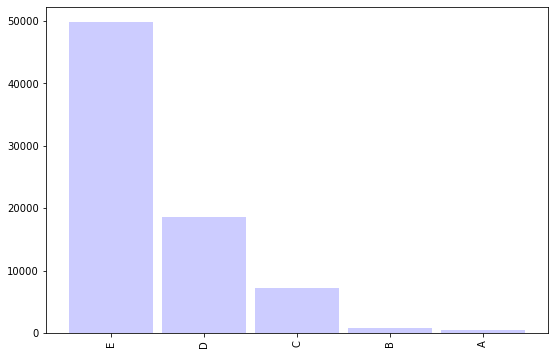

In [9]:
dist_freq_renda['Frequência'].plot.bar(width= 0.9, color = 'blue', alpha = 0.2, figsize=(9, 6))

> ### Conclusões

A partir dos dados gerados e a visualização do mesmo no gráfico acima percebe-se que a medida que a faixa salarial aumenta a frequência diminui. Em torno de 65% da população possui uma renda de até dois salários mínimos, enquanto apenas 0,55% possui renda superior a 25 salários mínimos.

### Histograma para as variáveis QUANTITATIVAS do dataset


> ### Idade

C:\Users\fscar\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


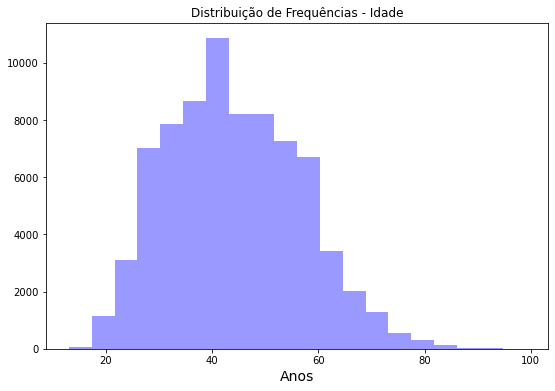

In [10]:
ax = sns.distplot(dados.Idade, kde = False, bins = 20, color='blue')

ax.figure.set_size_inches(9, 6)
ax.set_title('Distribuição de Frequências - Idade')
ax.set_xlabel('Anos', fontsize = 14)
ax

> ### Cálculo da mediana, média e moda para Idade

In [11]:
mediana = round(dados.Idade.median(), 2)
media = round(dados.Idade.mean(), 2)
moda = dados.Idade.mode()[0]
print('mediana: {}\n média: {}\n moda: {}'.format(mediana, media, moda))

mediana: 43.0
 média: 44.07
 moda: 40


Percebe-se a partir das medidas de tendência central que moda < mediana < media. Esta configuração de gráfico caracteriza um gráfico assimétrico à direita.

> ### Anos de Estudo

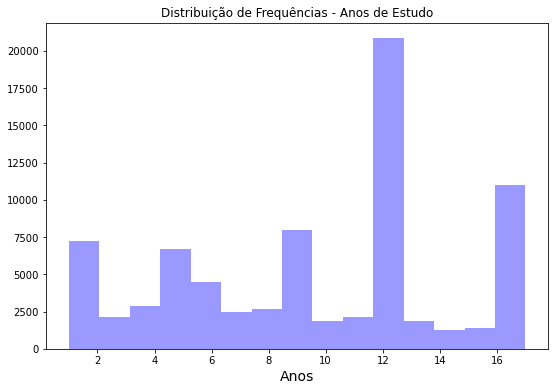

In [12]:
ax = sns.distplot(dados['Anos de Estudo'], kde = False, bins = 15, color='blue')

ax.figure.set_size_inches(9, 6)
ax.set_title('Distribuição de Frequências - Anos de Estudo')
ax.set_xlabel('Anos', fontsize = 14)
ax

> ### Cálculo da mediana, média e moda para Anos de Estudo

In [13]:
mediana = round(dados['Anos de Estudo'].median(), 2)
media = round(dados['Anos de Estudo'].mean(), 2)
moda = dados['Anos de Estudo'].mode()[0]
print('mediana: {}\n média: {}\n moda: {}'.format(mediana, media, moda))

mediana: 11.0
 média: 9.47
 moda: 12


Percebe-se a partir das medidas de tendência central que media < mediana < moda. Esta configuração de gráfico caracteriza um gráfico assimétrico à esquerda.

> ### Altura

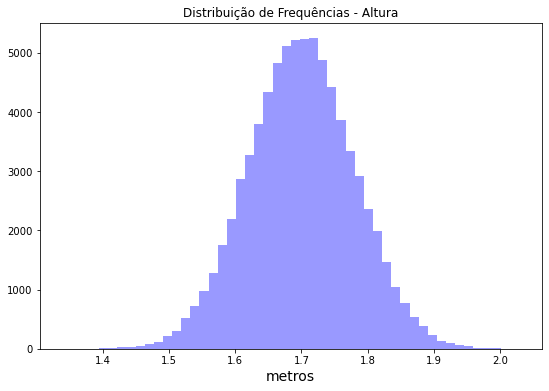

In [14]:
ax = sns.distplot(dados['Altura'], kde = False, color='blue')

ax.figure.set_size_inches(9, 6)
ax.set_title('Distribuição de Frequências - Altura')
ax.set_xlabel('metros', fontsize = 14)
ax

### Cálculo da mediana, média e moda para Altura

In [15]:
mediana = round(dados.Altura.median(), 3)
media = round(dados.Altura.mean(), 3)
moda = dados.Altura.mode()
print('mediana: {}\n média: {}\n moda: {}'.format(mediana, media, moda))

mediana: 1.699
 média: 1.7
 moda: 0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64


Percebe-se a partir das medidas de tendência central uma proximidade muito grande entre média, mediana e moda (esta última
tendo várias ocorrências). Neste caso o gráfico não possui assimetrias, ou seja, é um gráfico simétrico.

> ### Conclusões

A partir das análises de gráfico e de medidas centrais pode-ser tirar algumas conclusões para os seguintes gráficos:

Idade - A assimetria à direita do gráfico é explicada pela constatação da população idosa acima de 60 anos ser menos frequente do que a população mais jovem.

Anos de Estudo - Uma grande frequência de pessoas possui nível de escolaridade próximo a 12 anos de estudo, porém grande parte da população possui baixo nível de escolaridade, variando de menos de 2 anos a 8 anos de estudo, o que caracteriza a assimetria à esquerda do gráfico.

Altura - A maior parte da população possui estatura próxima a 1,70m, embora não tenha sido considerado o sexo dos indivíduos. Este tipo de gráfico possui dispersões à esquerda e à direita bem semelhantes, sem grande abruptalidade.

### Para a variável RENDA, foi construído um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

> ### Renda

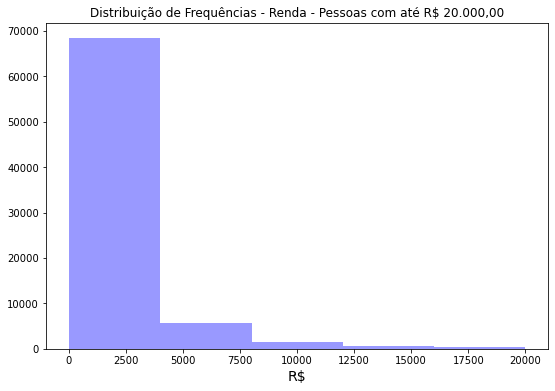

In [16]:
ax = sns.distplot(dados.query('Renda <= 20000')['Renda'], kde = False, bins = 5, color='blue')

ax.figure.set_size_inches(9, 6)
ax.set_title('Distribuição de Frequências - Renda - Pessoas com até R$ 20.000,00')
ax.set_xlabel('R$', fontsize = 14)
ax

### Construção de tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR

In [17]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [18]:
frequencia = pd.crosstab(
        dados.Sexo,
        dados.Cor
)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
percentual = (pd.crosstab(
        dados.Sexo,
        dados.Cor,
        normalize = True
) * 100).round(2)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões
A maior parte da população se classifica como pardo ou branco. Uma minoria (menos que 1 %) se enquadra como indígena ou amarelo. 

## Análise descritiva para a variável RENDA

### média aritimética

In [20]:
media = dados.Renda.mean()
media

2000.3831988547631

### mediana

In [21]:
mediana = dados.Renda.median()
mediana

1200.0

### moda

In [22]:
moda = dados.Renda.mode()
moda[0]

788

### desvio médio absoluto

In [23]:
desvio_medio_absoluto = round(dados.Renda.mad(), 2)
desvio_medio_absoluto

1526.5

### variância

In [24]:
variancia = round(dados.Renda.var(), 2)
variancia

11044906.01

### desvio-padrão

In [25]:
desvio_padrao = round(dados.Renda.std(), 2)
desvio_padrao

3323.39

### Obtenção da média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [26]:
tabela_renda = pd.crosstab(dados.Cor,
                         dados.Sexo,
                         aggfunc = {'mean', 'median', 'max'},
                         values = dados.Renda).round(2)
tabela_renda.rename(index = cor, inplace = True)
tabela_renda.rename(columns = sexo, inplace = True)
tabela_renda

max               mean             median         
Sexo     Masculino Feminino Masculino Feminino Masculino Feminino
Cor                                                              
Indígena     10000   120000   1081.71  2464.39     797.5    788.0
Branca      200000   100000   2925.74  2109.87    1700.0   1200.0
Preta        50000    23000   1603.86  1134.60    1200.0    800.0
Amarela      50000    20000   4758.25  3027.34    2800.0   1500.0
Parda       100000    30000   1659.58  1176.76    1200.0    800.0

### Obtenção das medidas de dispersão da variável RENDA segundo SEXO e COR

In [27]:
tabela_renda_dispersao = pd.crosstab(dados.Cor,
                         dados.Sexo,
                         aggfunc = {'mad', 'var', 'std'},
                         values = dados.Renda).round(2)
tabela_renda_dispersao.rename(index = cor, inplace = True)
tabela_renda_dispersao.rename(columns = sexo, inplace = True)
tabela_renda_dispersao

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Percebe-se pela tabela de medidas centrais que a população de cor amarela recebe maiores salários, embora haja uma discrepância quanto ao sexo. Os salários médios recebidos pela população feminina foi considerado menor para todas as cores.

### Construção de um box plot da variável RENDA segundo SEXO e COR

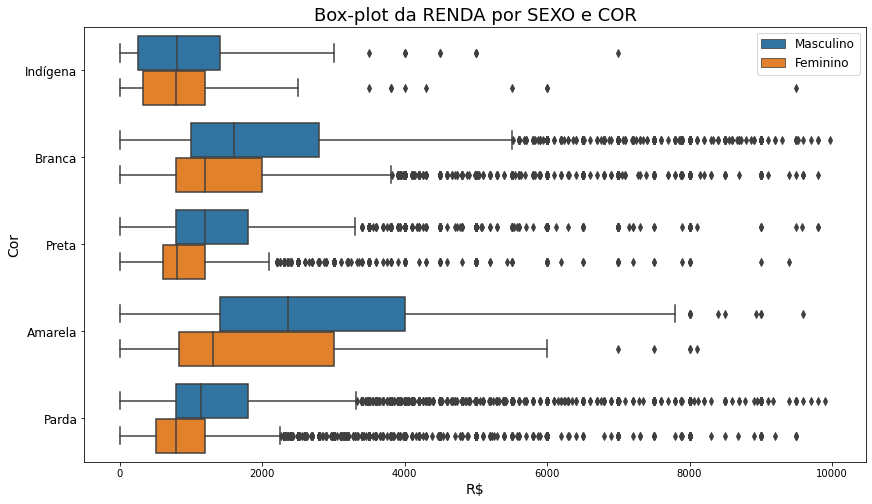

In [28]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax


> ### Conclusões

Com exceção da raça indígena, que aparentemente possui uma igualdade salarial bem equilibrada, o box-plot nos permite visualizar que a diferença para as outras raças é nítida quanto ao sexo, tendo o sexo feminino menor média salarial em todas. Também reafirma-se que a raça amarela é a mais bem remunerada tanto para o sexo masculino quanto para o feminino. 

### Percentual de pessoas do <i>dataset</i> que ganham um salário mínimo (R$ 788,00) ou menos

In [29]:
from scipy import stats

In [30]:
percentual = round(stats.percentileofscore(dados.Renda, 788, kind='weak'), 2)
print("{}%".format(percentual))

28.87%


### Valor máximo ganho por 99% das pessoas do <i>dataset</i>

In [31]:
percentual = dados.Renda.quantile(0.99)
print("R$ {0:.2f}".format(percentual))

R$ 15000.00


### Obtenção da média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [32]:
tabela_renda = pd.crosstab(dados['Anos de Estudo'],
                         dados.Sexo,
                         aggfunc = {'mean', 'median', 'std'},
                         values = dados.Renda).round(2)
tabela_renda.rename(index = anos_de_estudo, inplace = True)
tabela_renda.rename(columns = sexo, inplace = True)
tabela_renda

mean             median           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     std           
Sexo                           Masculino Feminino  
Anos de Estudo                                     
Sem instrução e menos de 1 ano   1023.90   639.31  
1 ano                            1331.95   425.29  
2 anos                           1435.17   498.23  
3 anos                           2143.80   424.12  
4 anos                           1419.82   629.55  
5 anos                           1484.65   635.78  
6 anos                           1476.63   574.55  
7 anos                           1419.71   602.04  
8 anos                           1515.58   896.78  
9 anos                           2137.66   973.22  
10 anos                          2078.61   620.61  
11 anos                          2676.54  1819.04  
12 anos                          2268.08  4851.83  
13 anos                          2797.12  2053.79  
14 anos                          3987.21  2064.08  
15 anos ou mais                  7447.61  4212.77  
Não determinados                  979.65   459.99

Através da tabela percebe-se de forma grosseira que o salário médio é proporcional ao nível de escolaridade. Aqueles que possuem 15 anos ou mais de estudo detém os maiores salários. 

### Construção de um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [33]:
tabela_renda = pd.crosstab(dados.query('Renda < 10000 and Idade ==40')['Anos de Estudo'],
                         dados.Sexo,
                         aggfunc = {'median'},
                         values = dados.Renda).round(2)
tabela_renda.rename(index = anos_de_estudo, inplace = True)
tabela_renda.rename(columns = sexo, inplace = True)
tabela_renda

median         
Sexo                           Masculino Feminino
Anos de Estudo                                   
Sem instrução e menos de 1 ano     788.0    425.0
1 ano                              788.0    460.0
2 anos                             850.0    450.0
3 anos                             788.0    300.0
4 anos                            1000.0    788.0
5 anos                            1200.0    788.0
6 anos                            1200.0    788.0
7 anos                            1400.0    788.0
8 anos                            1300.0    850.0
9 anos                            1500.0    788.0
10 anos                           1400.0   1000.0
11 anos                           1700.0   1000.0
12 anos                           2100.0   1000.0
13 anos                           2500.0   1500.0
14 anos                           2500.0   1215.0
15 anos ou mais                   3970.0   2138.0
Não determinados                     NaN    800.0

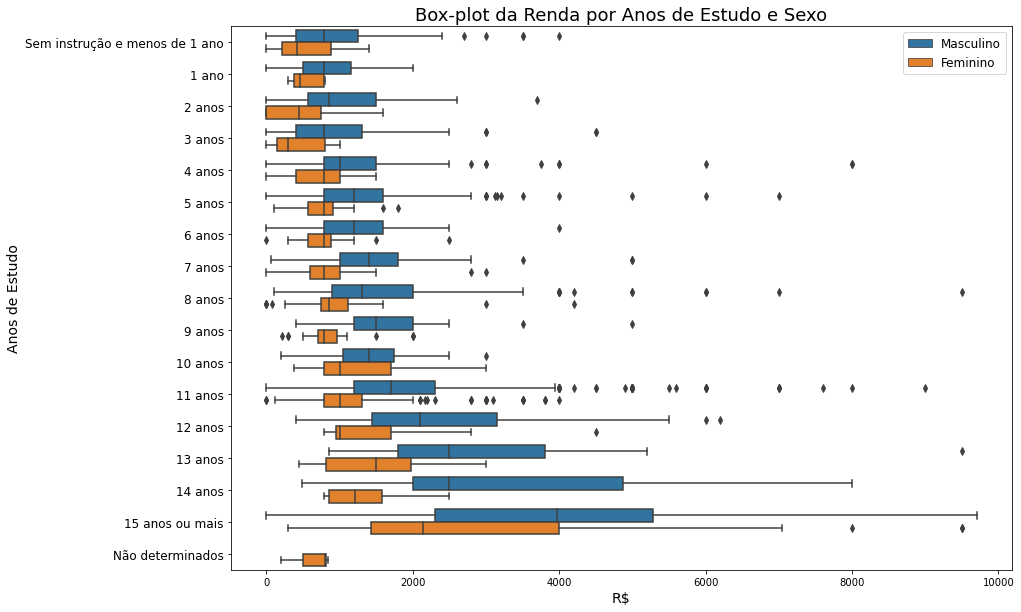

In [34]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade ==40'), orient='h')

ax.figure.set_size_inches(14, 10)

ax.set_title('Box-plot da Renda por Anos de Estudo e Sexo', fontsize=18)

ax.set_xlabel('R$', fontsize=14)

ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([value for value in anos_de_estudo.values()], fontsize=12)

# Configuração da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)


ax


> ### Conclusões

Através da visualização do box-plot reafirma-se a conclusão de que a maior distribuição de renda está destinada aqueles que possuem nível de escolaridade mais alto, especialmente os situados na faixa de 15 anos ou mais de estudo, tanto para homens quanto para mulheres. Porém em todas as ocasiões, a remuneração média feminina se situa abaixo da masculina, mesmo possuindo nível de escolaridade equivalente, o que possivelmente reflete um problema estrutural do mercado de trabalho brasileiro e reflete o machismo na sociedade.

### Obtenção da média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [35]:
renda_estatisticas_por_uf = dados.groupby(['UF'])['Renda']
media = renda_estatisticas_por_uf.mean()
mediana = renda_estatisticas_por_uf.median()
valor_maximo = renda_estatisticas_por_uf.max()
desvio_padrao = renda_estatisticas_por_uf.std()

df_renda_estatisticas_por_uf = pd.DataFrame({'média': media,
                                            'mediana': mediana,
                                            'valor máximo': valor_maximo,
                                            'desvio padrão': desvio_padrao})
df_renda_estatisticas_por_uf.rename(index = uf, inplace = True)
df_renda_estatisticas_por_uf

,desvio padrão,mediana,média,valor máximo
UF,,,,
Rondônia,2406.161161,1200,1789.761223,50000
Acre,2276.233415,900,1506.091782,30000
Amazonas,1757.935591,900,1445.130100,22000
Roraima,2079.659238,1000,1783.588889,20000
Pará,2053.779555,850,1399.076871,50000
Amapá,2020.688632,1200,1861.353516,15580
Tocantins,2934.590741,1000,1771.094946,60000
Maranhão,1887.816905,700,1019.432009,30000
Piauí,2373.355726,750,1074.550784,40000


> ### Estado com maior média salarial

In [36]:
media_maxima = df_renda_estatisticas_por_uf['média'].max()

selecao = df_renda_estatisticas_por_uf['média'] == media_maxima

estado = df_renda_estatisticas_por_uf[selecao].index[0]
print('O estado {} possui a maior média salarial: R$ {}'.format(estado, round(media_maxima,2)))

O estado Distrito Federal possui a maior média salarial: R$ 4241.95


### Construção de um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
####  Foi utilizado somente as informações de pessoas com renda abaixo de R$ 10.000</font>

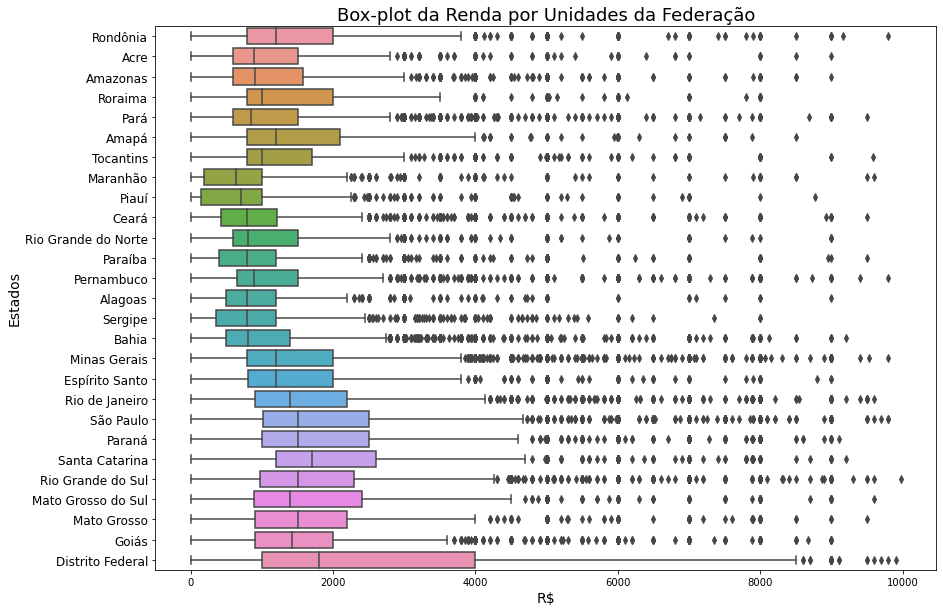

In [37]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(14, 10)

ax.set_title('Box-plot da Renda por Unidades da Federação', fontsize=18)

ax.set_xlabel('R$', fontsize=14)

ax.set_ylabel('Estados', fontsize=14)
ax.set_yticklabels([value for value in uf.values()], fontsize=12)

ax



> ### Conclusões

Pela visualização do box-plot pode-se perceber que os estados que possuem maior média salarial se concentram nas regiões Centro-Oeste, Sudeste e Sul do país.